# Secondary Structure Graphs & Chain Graphs
In this tutorial, we'll be looking at higher-order graphs - that is graphs of Secondary Structure Elements and interacting chains ([quaternary structure](https://en.wikipedia.org/wiki/Protein_quaternary_structure)) - as well as assorted visualisation tools.

Graphein provides utilities for computing these graphs from residue-level graphs. I'd recommend checking out [this tutorial]() for more information.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/a-r-j/graphein/blob/master/notebooks/higher_order_graphs.ipynb) [![GitHub](https://img.shields.io/badge/-View%20on%20GitHub-181717?logo=github&logoColor=ffffff)](https://github.com/a-r-j/graphein/blob/master/notebooks/higher_order_graphs.ipynb)


First, we'll construct a graph to work with



In [1]:
# Install Graphein if necessary
# !pip install graphein

# Install DSSP if necessary
# !sudo apt-get install dssp (better for colab) OR !conda install -c salilab dssp

In [2]:
import logging
import networkx as nx
import matplotlib.pyplot as plt
logging.getLogger("matplotlib").setLevel(logging.WARNING)
logging.getLogger("graphein").setLevel(logging.INFO)

import graphein.protein as gp

new_funcs = {"keep_hets": False,
             "edge_construction_functions": [gp.add_peptide_bonds,
                                              gp.add_hydrogen_bond_interactions,
                                              gp.add_disulfide_interactions,
                                              gp.add_ionic_interactions,
                                              gp.add_aromatic_interactions,
                                              gp.add_aromatic_sulphur_interactions,
                                              gp.add_cation_pi_interactions],
             "dssp_config": gp.DSSPConfig()
            }
config = gp.ProteinGraphConfig(**new_funcs)
g = gp.construct_graph(config=config, pdb_code='4hhb')
gp.plotly_protein_structure_graph(g, node_size_multiplier=1)

INFO:graphein.protein.edges.distance:Found 208 hbond interactions.
INFO:graphein.protein.edges.distance:Found 12 hbond interactions.
INFO:graphein.protein.edges.distance:Found 6 disulfide interactions.
INFO:graphein.protein.edges.distance:Found 4566 ionic interactions.
INFO:graphein.protein.edges.distance:Found: 84 aromatic-aromatic interactions


## Secondary Structure Graphs
We use [DSSP](https://en.wikipedia.org/wiki/DSSP_(hydrogen_bond_estimation_algorithm)) to compute secondary structures. This is stored under `d["ss"]` in the node attributes. Eg:

In [3]:
g = gp.secondary_structure(g)
for n, d in g.nodes(data=True):
    print(d["ss"])
    if d["ss"] == "T":
        break

/Users/arianjamasb/opt/anaconda3/envs/graphein-wip/lib/python3.8/site-packages/biopandas/pdb/pandas_pdb.py:554: UserWarning:

Column node_id is not an expected column and will be skipped.

INFO:graphein.protein.utils:Successfully saved PDB dataframe to /var/folders/p1/0qtk6t_520n7k4bvk1p26l_w0000gn/T/tmp4ltkgd3l/4hhb.pdb


-
-
-
H
H
H
H
H
H
H
H
H
H
H
H
H
H
T


We can compute either a multigraph, where each edge in the selection is preserved (e.g. multiple edges between nodes ``H1`` and ``H2`` are permitted), or a weighted graph where we aggregate multiple edges between a pair of nodes into and preserve the edge information as metadata.

### MultiGraph

In [4]:
ss_graph = gp.compute_secondary_structure_graph(g, remove_self_loops=True)
print(nx.info(ss_graph))

for u, v, d in g.edges(data=True):
    print(u, v, d)

Name: 4hhb
Type: MultiGraph
Number of nodes: 80
Number of edges: 107
Average degree:   2.6750
A:VAL:1 A:LEU:2 {'kind': {'peptide_bond'}}
A:LEU:2 A:SER:3 {'kind': {'peptide_bond'}}
A:SER:3 A:PRO:4 {'kind': {'peptide_bond'}}
A:SER:3 A:ASP:6 {'kind': {'hbond'}}
A:PRO:4 A:ALA:5 {'kind': {'peptide_bond'}}
A:ALA:5 A:ASP:6 {'kind': {'peptide_bond'}}
A:ASP:6 A:LYS:7 {'kind': {'peptide_bond', 'ionic'}}
A:ASP:6 A:LYS:127 {'kind': {'hbond', 'ionic'}}
A:ASP:6 A:SER:124 {'kind': {'hbond'}}
A:ASP:6 C:ARG:141 {'kind': {'ionic'}}
A:LYS:7 A:THR:8 {'kind': {'peptide_bond'}}
A:LYS:7 A:ASP:74 {'kind': {'hbond', 'ionic'}}
A:THR:8 A:ASN:9 {'kind': {'peptide_bond'}}
A:ASN:9 A:VAL:10 {'kind': {'peptide_bond'}}
A:VAL:10 A:LYS:11 {'kind': {'peptide_bond'}}
A:LYS:11 A:ALA:12 {'kind': {'peptide_bond'}}
A:LYS:11 A:ASP:74 {'kind': {'ionic'}}
A:ALA:12 A:ALA:13 {'kind': {'peptide_bond'}}
A:ALA:13 A:TRP:14 {'kind': {'peptide_bond'}}
A:TRP:14 A:GLY:15 {'kind': {'peptide_bond'}}
A:GLY:15 A:LYS:16 {'kind': {'peptide_bond

/Users/arianjamasb/opt/anaconda3/envs/graphein-wip/lib/python3.8/site-packages/mpl_chord_diagram/utilities.py:11: RuntimeWarning:

invalid value encountered in true_divide



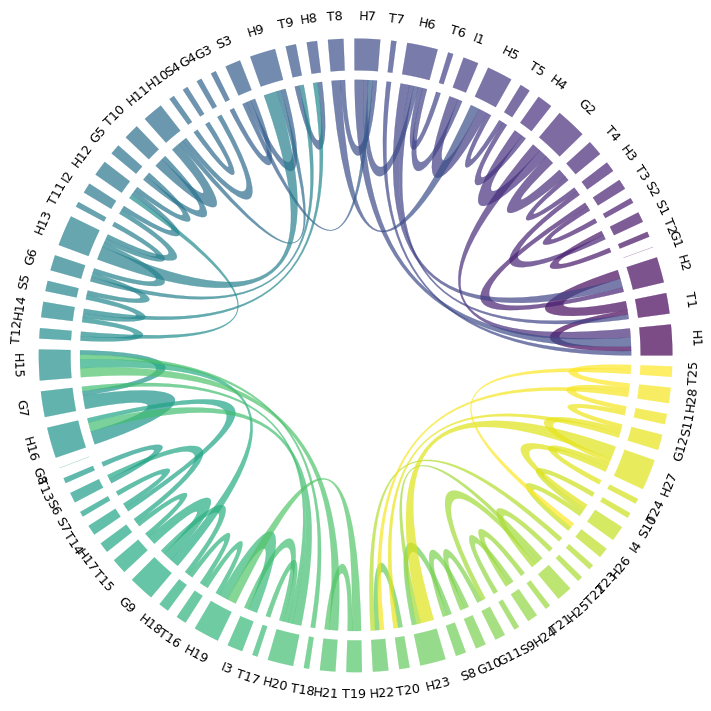

In [5]:
plt.rcParams["figure.figsize"] = (10, 10)
gp.plot_chord_diagram(ss_graph)

In [6]:
ss_graph = gp.compute_secondary_structure_graph(g, remove_self_loops=True, return_weighted_graph=True)
print(nx.info(ss_graph))
for u, v, d in ss_graph.edges(data=True):
    print(u, v, d)

Name: 4hhb
Type: Graph
Number of nodes: 80
Number of edges: 86
Average degree:   2.1500
H1 H7 {'weight': 3, 'kind': {'hbond', 'ionic'}, 'hbond': 2, 'ionic': 1}
H1 G2 {'weight': 3, 'kind': {'hbond', 'ionic'}, 'hbond': 1, 'ionic': 2}
H1 T7 {'weight': 1, 'kind': {'ionic'}, 'ionic': 1}
H1 T1 {'weight': 1, 'kind': {'peptide_bond'}, 'peptide_bond': 1}
T1 H2 {'weight': 2, 'kind': {'peptide_bond', 'ionic'}, 'peptide_bond': 1, 'ionic': 1}
T1 H6 {'weight': 1, 'kind': {'aromatic'}, 'aromatic': 1}
H2 H6 {'weight': 2, 'kind': {'ionic'}, 'ionic': 2}
H2 T3 {'weight': 1, 'kind': {'ionic'}, 'ionic': 1}
T2 S1 {'weight': 2, 'kind': {'peptide_bond', 'aromatic'}, 'peptide_bond': 1, 'aromatic': 1}
S1 H3 {'weight': 1, 'kind': {'aromatic'}, 'aromatic': 1}
S2 T3 {'weight': 1, 'kind': {'peptide_bond'}, 'peptide_bond': 1}
H3 T4 {'weight': 1, 'kind': {'peptide_bond'}, 'peptide_bond': 1}
T4 G2 {'weight': 2, 'kind': {'peptide_bond', 'ionic'}, 'peptide_bond': 1, 'ionic': 1}
G2 H4 {'weight': 2, 'kind': {'peptide_bond

## Chain Graph
Chain graphs represent the quaternary structure of a protein complex; nodes represent individual chains and edges are the interactions between them. Again, we can compute either a multigraph or a weighted graphs.

### Multigraph

INFO:graphein.protein.edges.distance:Found 1285 hbond interactions.
INFO:graphein.protein.edges.distance:Found 231 hbond interactions.
INFO:graphein.protein.edges.distance:Found 44 disulfide interactions.
INFO:graphein.protein.edges.distance:Found 30676 ionic interactions.
INFO:graphein.protein.edges.distance:Found: 610 aromatic-aromatic interactions


A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'hbond', 'ionic'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'ionic'}}
A A {'kind': {'peptide_bond', 'ionic'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}


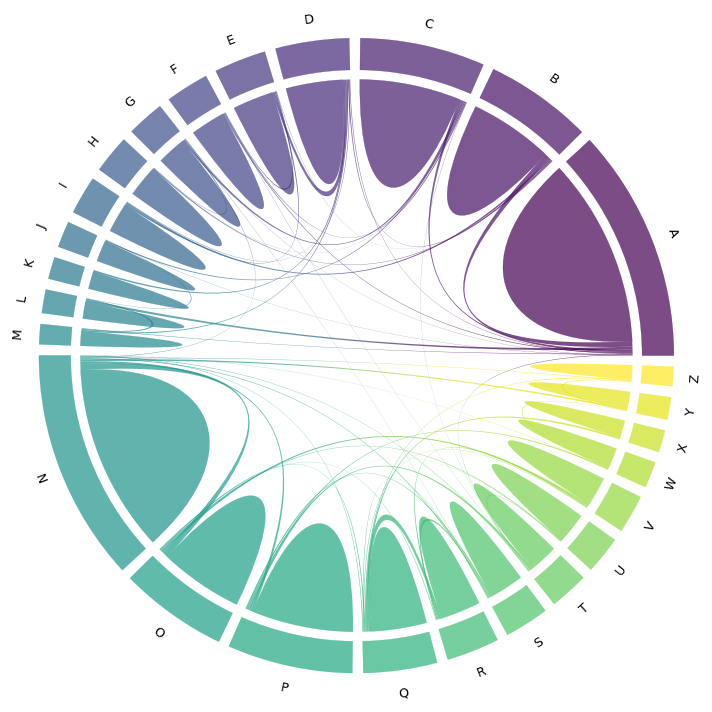

In [7]:
g = gp.construct_graph(config=config, pdb_code='2y69')
chain_graph = gp.compute_chain_graph(g, remove_self_loops=False, return_weighted_graph=False)

mat = nx.adjacency_matrix(chain_graph)
a = gp.visualisation.chord_diagram(mat, names=list(chain_graph.nodes), use_gradient=True)

for i, (u, v, d) in enumerate(chain_graph.edges(data=True)):
    print(u, v, d)
    if i == 15:
        break

### Weighted Graph

A A {'weight': 587, 'kind': {'aromatic', 'ionic', 'peptide_bond', 'hbond'}, 'peptide_bond': 512, 'hbond': 11, 'ionic': 18, 'aromatic': 46}
A L {'weight': 8, 'kind': {'aromatic', 'ionic'}, 'ionic': 4, 'aromatic': 4}
A J {'weight': 1, 'kind': {'aromatic'}, 'aromatic': 1}
A B {'weight': 17, 'kind': {'aromatic', 'ionic', 'hbond'}, 'hbond': 5, 'ionic': 10, 'aromatic': 2}
A C {'weight': 8, 'kind': {'aromatic', 'ionic'}, 'ionic': 5, 'aromatic': 3}
A T {'weight': 2, 'kind': {'hbond', 'aromatic'}, 'hbond': 1, 'aromatic': 1}
A G {'weight': 1, 'kind': {'hbond'}, 'hbond': 1}
A D {'weight': 2, 'kind': {'ionic'}, 'ionic': 2}
A M {'weight': 2, 'kind': {'ionic'}, 'ionic': 2}
A F {'weight': 3, 'kind': {'hbond', 'aromatic', 'ionic'}, 'ionic': 1, 'aromatic': 1, 'hbond': 1}
B B {'weight': 257, 'kind': {'aromatic', 'ionic', 'peptide_bond', 'hbond'}, 'peptide_bond': 226, 'aromatic': 5, 'ionic': 21, 'hbond': 5}
B D {'weight': 3, 'kind': {'aromatic', 'ionic'}, 'aromatic': 1, 'ionic': 2}
B I {'weight': 7, 'kin

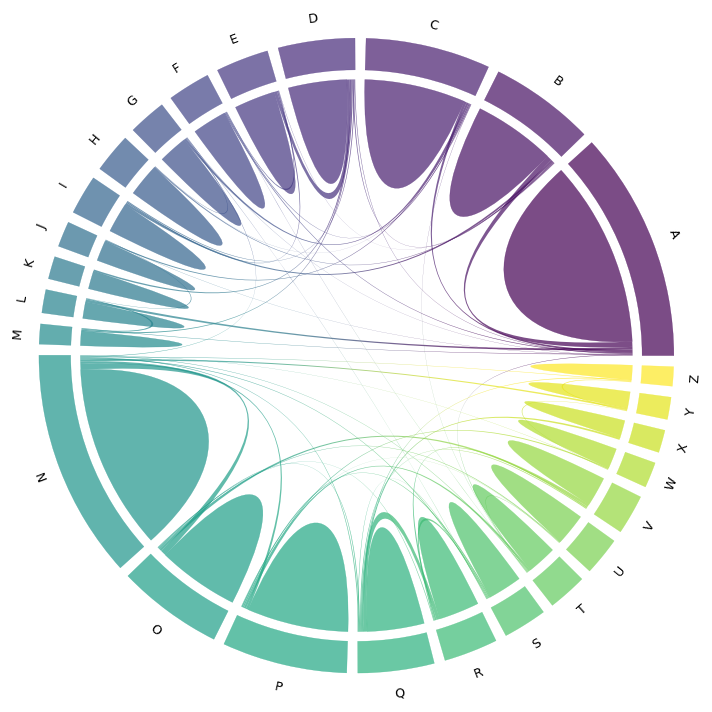

In [8]:
chain_graph = gp.compute_chain_graph(g, remove_self_loops=False, return_weighted_graph=True)

mat = nx.adjacency_matrix(chain_graph)
a = gp.visualisation.chord_diagram(mat, names=list(chain_graph.nodes), use_gradient=True)

for u, v, d in chain_graph.edges(data=True):
    print(u,v, d)